In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
calendar_df = pd.read_excel('D:/Datset/Budget Sales data/Budget Sales data/AdventureWorks_Database.xlsx', sheet_name='Calender')
customers_df = pd.read_excel('D:/Datset/Budget Sales data/Budget Sales data/AdventureWorks_Database.xlsx', sheet_name='Customers')
product_df = pd.read_excel('D:/Datset/Budget Sales data/Budget Sales data/AdventureWorks_Database.xlsx', sheet_name='Product')
territory_df = pd.read_excel('D:/Datset/Budget Sales data/Budget Sales data/AdventureWorks_Database.xlsx', sheet_name='Territory')
sales_df = pd.read_excel('D:/Datset/Budget Sales data/Budget Sales data/AdventureWorks_Database.xlsx', sheet_name='Sales')
budget_df = pd.read_excel('D:/Datset/Budget Sales data/Budget Sales data/Budget.xlsx', sheet_name='Budget', skiprows=2)

# Clean the Budget data
budget_df.columns = budget_df.iloc[0]
budget_df = budget_df[1:]  # Remove the first row
budget_df_melted = budget_df.melt(
    id_vars=["Category", "Subcategory", "ProductName", "ProductKey"],
    var_name="MonthYear",
    value_name="BudgetAmount"
)
budget_df_melted["MonthYear"] = pd.to_datetime(budget_df_melted["MonthYear"], format="%b, %Y", errors="coerce")

In [2]:
# Clean Sales data
sales_df_cleaned = sales_df.loc[:, ~sales_df.columns.str.contains('Unnamed')]

# Merge Sales with Product and Territory data
sales_with_product = pd.merge(sales_df_cleaned, product_df, on='ProductKey', how='left')
sales_with_territory = pd.merge(sales_with_product, territory_df, on='SalesTerritoryKey', how='left')

# Merge with Budget data
sales_budget_merged = pd.merge(
    sales_with_territory, budget_df_melted,
    left_on=["ProductKey", "OrderDate"],
    right_on=["ProductKey", "MonthYear"],
    how='left'
)

In [3]:
# Compute Variance
sales_budget_merged["Variance"] = sales_budget_merged["SalesAmount"] - sales_budget_merged["BudgetAmount"]

# Analysis: Total Sales by Region
sales_by_region = sales_budget_merged.groupby("Region")["SalesAmount"].sum().reset_index()

In [4]:
# Analysis: Variance by Category
variance_by_category = sales_budget_merged.groupby("Category")["Variance"].sum().reset_index()

# Visualization: Total Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_region, x="Region", y="SalesAmount", palette="viridis")
plt.title("Total Sales by Region")
plt.ylabel("Sales Amount")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'Category'

In [8]:
# Visualization: Variance by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=variance_by_category, x="Category", y="Variance", palette="coolwarm")
plt.title("Variance by Category")
plt.ylabel("Variance")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'variance_by_category' is not defined

<Figure size 1000x600 with 0 Axes>

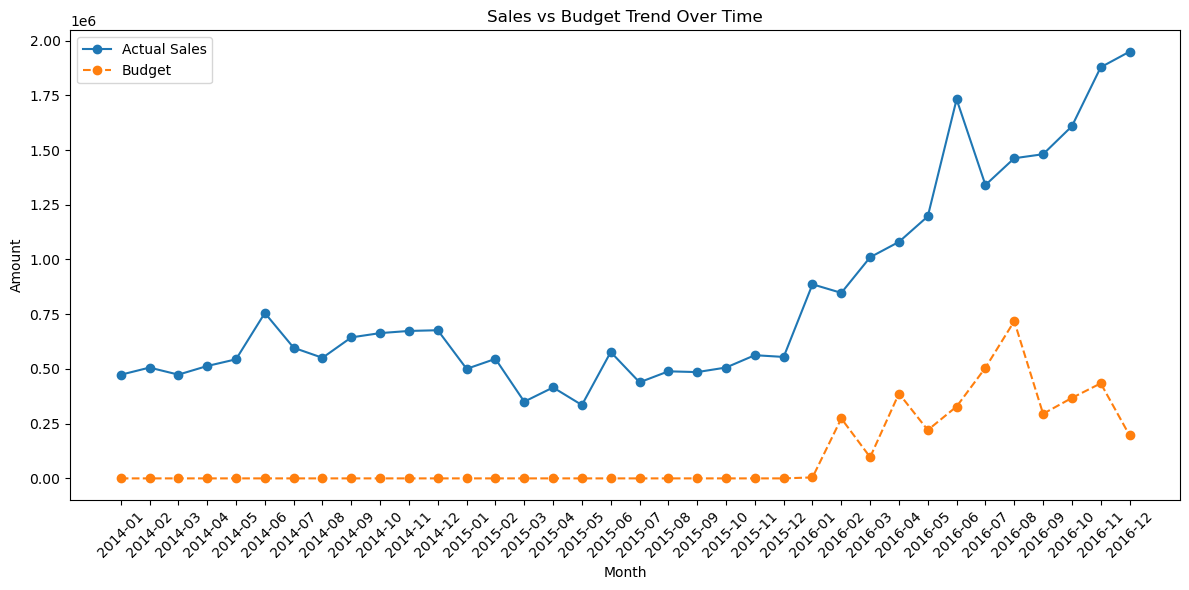

In [11]:
# Visualization: Sales vs Budget (Trend over Time)
sales_budget_merged["OrderMonth"] = sales_budget_merged["OrderDate"].dt.to_period("M")
trend_data = sales_budget_merged.groupby("OrderMonth")[["SalesAmount", "BudgetAmount"]].sum().reset_index()
trend_data["OrderMonth"] = trend_data["OrderMonth"].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(trend_data["OrderMonth"], trend_data["SalesAmount"], label="Actual Sales", marker="o")
plt.plot(trend_data["OrderMonth"], trend_data["BudgetAmount"], label="Budget", marker="o", linestyle="--")
plt.title("Sales vs Budget Trend Over Time")
plt.ylabel("Amount")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
